In [1]:
import os
import random
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

ROOT_DIR = "./data"
RANDOM_SEED = 110

## Fill1

1. Discharged time - Dispense volume (분포 동일, stage 2 제외)

In [21]:
df = pd.read_csv("../data/pre_1.csv", header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 156 entries, Equipment_Dam to Workorder Category
dtypes: float64(72), int64(76), object(8)
memory usage: 48.2+ MB


,1st Pressure Judge Value_AutoClave,2nd Pressure Judge Value_AutoClave,3rd Pressure Judge Value_AutoClave,Chamber Temp. Judge Value_AutoClave,target,Model.Suffix,Workorder,Workorder Category
0,OK,OK,OK,OK,Normal,AJX75334505,4F1XA938-1,4F1X
1,OK,OK,OK,OK,Normal,AJX75334505,3KPM0016-2,3KPM
2,OK,OK,OK,OK,Normal,AJX75334501,4E1X9167-1,4E1X
3,OK,OK,OK,OK,Normal,AJX75334501,3K1X0057-1,3K1X
4,OK,OK,OK,NG,Normal,AJX75334501,3HPM0007-1,3HPM
...,...,...,...,...,...,...,...,...
40501,OK,OK,OK,OK,Normal,AJX75334501,3J1XF434-2,3J1X
40502,OK,OK,OK,NG,Normal,AJX75334501,4E1XC796-1,4E1X
40503,OK,OK,OK,NG,Normal,AJX75334501,4C1XD438-1,4C1X
40504,OK,OK,OK,OK,Normal,AJX75334501,3I1XA258-1,3I1X


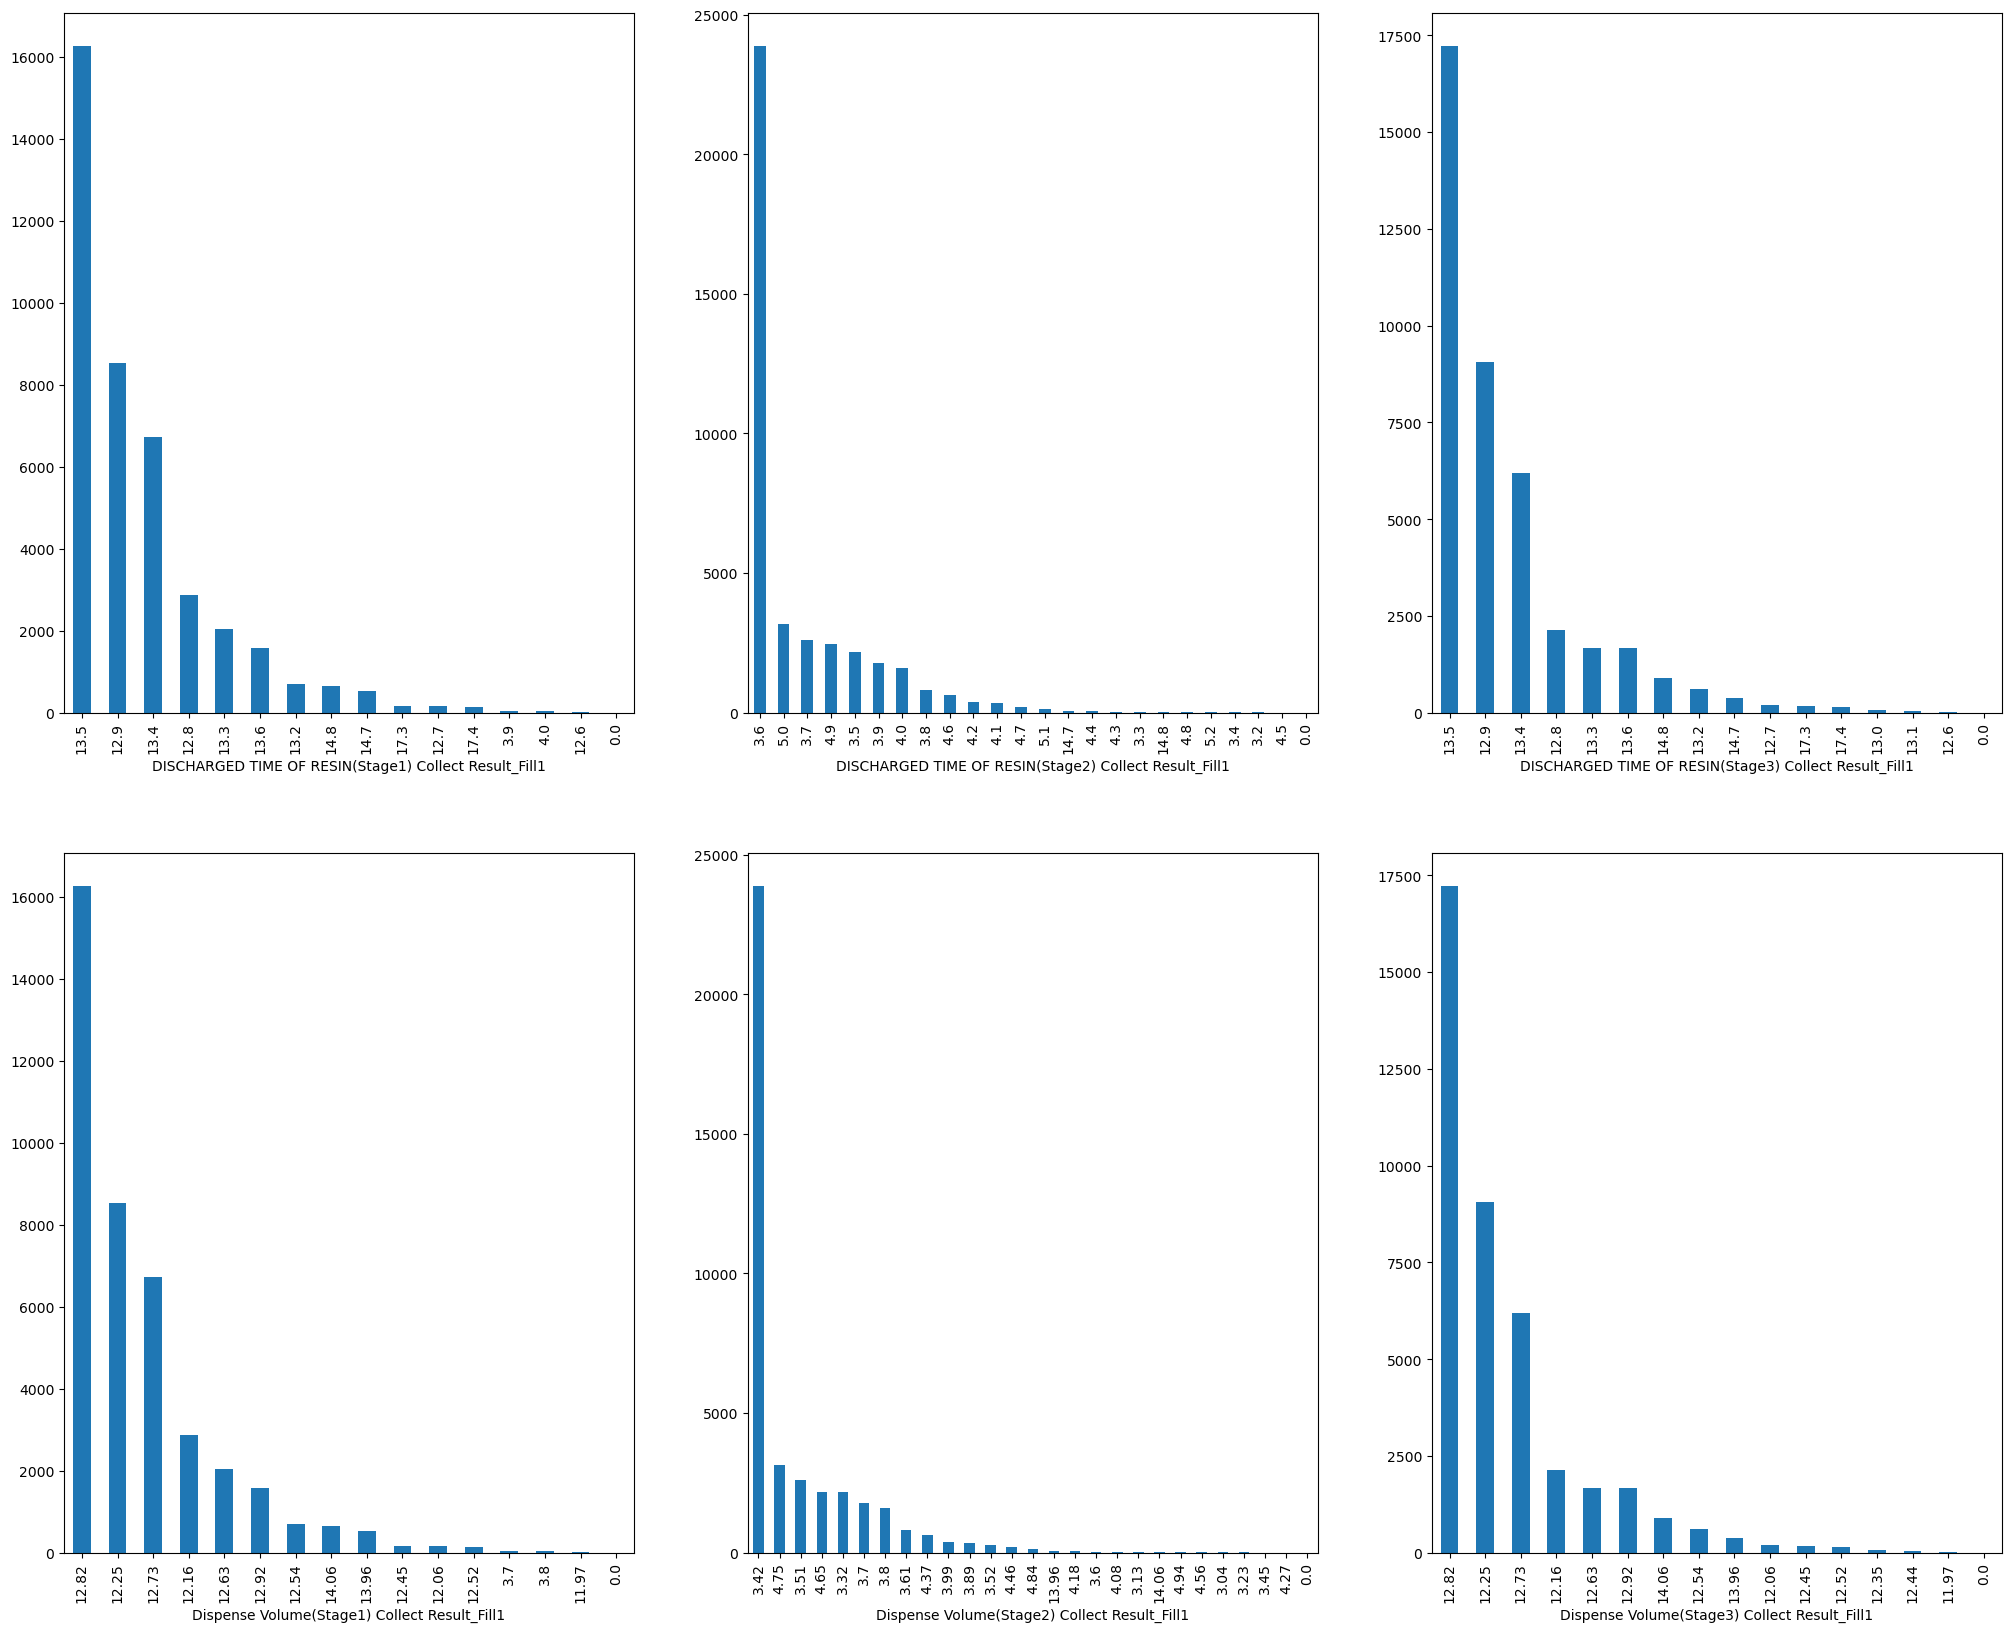

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 20))

df["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1"].value_counts().plot.bar(ax=axes[0,0]);
df["DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1"].value_counts().plot.bar(ax=axes[0,1]);
df["DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1"].value_counts().plot.bar(ax=axes[0,2]);

df["Dispense Volume(Stage1) Collect Result_Fill1"].value_counts().plot.bar(ax=axes[1,0]);
df["Dispense Volume(Stage2) Collect Result_Fill1"].value_counts().plot.bar(ax=axes[1,1]);
df["Dispense Volume(Stage3) Collect Result_Fill1"].value_counts().plot.bar(ax=axes[1,2]);

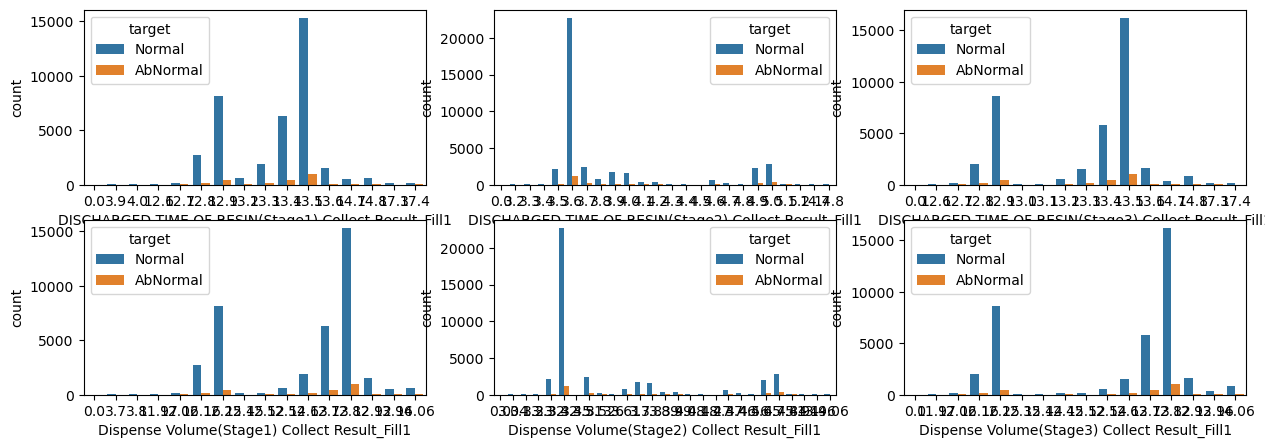

In [4]:
# target이랑 함께 시각화

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))

sns.countplot(x="DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1", hue="target", data=df, ax=axes[0, 0]);
sns.countplot(x="DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1", hue="target", data=df, ax=axes[0, 1]);
sns.countplot(x="DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1", hue="target", data=df, ax=axes[0, 2]);


sns.countplot(x="Dispense Volume(Stage1) Collect Result_Fill1", hue="target", data=df, ax=axes[1,0]);
sns.countplot(x="Dispense Volume(Stage2) Collect Result_Fill1", hue="target", data=df, ax=axes[1,1]);
sns.countplot(x="Dispense Volume(Stage3) Collect Result_Fill1", hue="target", data=df, ax=axes[1,2]);

In [29]:
Fill1_df = df.loc[:, df.columns.str.contains('_Fill1')]
Fill1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 30 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Equipment_Fill1                                             40506 non-null  int64  
 1   DISCHARGED SPEED OF RESIN Collect Result_Fill1              40506 non-null  float64
 2   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1       40506 non-null  float64
 3   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1       40506 non-null  float64
 4   DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1       40506 non-null  float64
 5   Dispense Volume(Stage1) Collect Result_Fill1                40506 non-null  float64
 6   Dispense Volume(Stage2) Collect Result_Fill1                40506 non-null  float64
 7   Dispense Volume(Stage3) Collect Result_Fill1                40506 non-null  float64
 

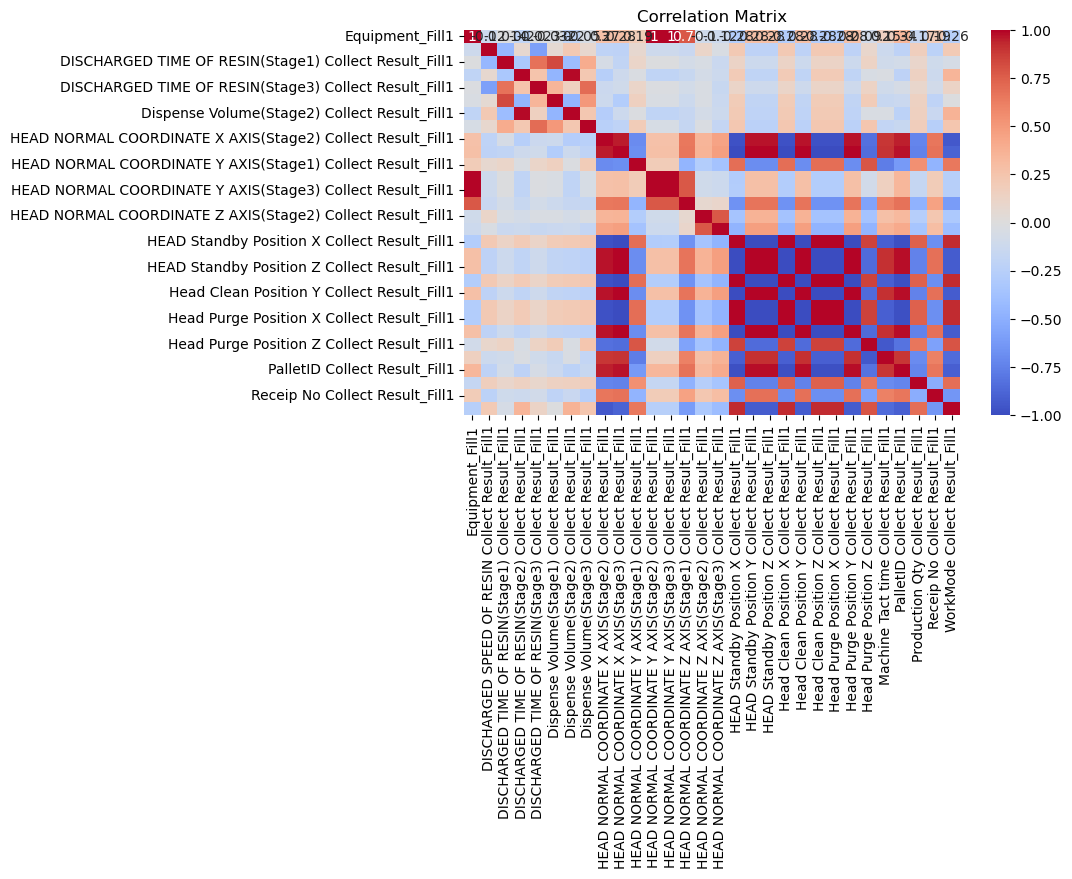

In [30]:
# heatmap
# non-numeric data는 제거하고 heatmap 그림

heatmap: plt.figure(figsize=(8, 5))
sns.heatmap(Fill1_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix');

In [32]:
# 각 stage별 correlation 확인

df[["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1", "Dispense Volume(Stage1) Collect Result_Fill1"]].corr()

,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1,Dispense Volume(Stage1) Collect Result_Fill1
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1,1.000000,0.834402
Dispense Volume(Stage1) Collect Result_Fill1,0.834402,1.000000


In [34]:
df[["DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1", "Dispense Volume(Stage2) Collect Result_Fill1"]].corr()

,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1,Dispense Volume(Stage2) Collect Result_Fill1
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1,1.000000,0.988529
Dispense Volume(Stage2) Collect Result_Fill1,0.988529,1.000000


In [33]:
df[["DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1", "Dispense Volume(Stage3) Collect Result_Fill1"]].corr()

,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1,Dispense Volume(Stage3) Collect Result_Fill1
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1,1.000000,0.699766
Dispense Volume(Stage3) Collect Result_Fill1,0.699766,1.000000


In [39]:
# Stage 1,2,3 pca => 새로운 열 생성
# Stage 1

x = df[["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1", "Dispense Volume(Stage1) Collect Result_Fill1"]]
x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

from sklearn.decomposition import PCA

pca = PCA(n_components=1) # 주성분을 몇개로 할지 결정
pca_result = pca.fit_transform(x)

df["DISCHARGED SPEED - Dispense Time Stage 1 PCA_Fill1"] = pca_result

'DISCHARGED SPEED - Dispense Time Stage 1 PCA_Fill1'

In [41]:
# Stage 2

x = df[["DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1", "Dispense Volume(Stage2) Collect Result_Fill1"]]
x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

from sklearn.decomposition import PCA

pca = PCA(n_components=1) # 주성분 1개
pca_result = pca.fit_transform(x)

df["DISCHARGED SPEED - Dispense Time Stage 2 PCA_Fill1"] = pca_result

In [44]:
# Stage 3

x = df[["DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1", "Dispense Volume(Stage3) Collect Result_Fill1"]]
x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

from sklearn.decomposition import PCA

pca = PCA(n_components=1) # 주성분 1개
pca_result = pca.fit_transform(x)

df["DISCHARGED SPEED - Dispense Time Stage 3 PCA_Fill1"] = pca_result

2. Head Normal Coordinate X, Y, Z (Stage 1,2,3) - KBins

In [52]:
# kb column 생성

from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile', random_state=RANDOM_SEED)

df["HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result Class_Fill1"] = kb.fit_transform(df["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam"].values.reshape(-1,1))
df["HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result Class_Fill1"] = kb.fit_transform(df["DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam"].values.reshape(-1,1))

# kb.bin_edges_

In [53]:
df["HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result Class_Fill1"] = kb.fit_transform(df["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam"].values.reshape(-1,1))
df["HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result Class_Fill1"] = kb.fit_transform(df["DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam"].values.reshape(-1,1))
df["HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result Class_Fill1"] = kb.fit_transform(df["DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam"].values.reshape(-1,1))

In [54]:
df["HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result Class_Fill1"] = kb.fit_transform(df["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam"].values.reshape(-1,1))
df["HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result Class_Fill1"] = kb.fit_transform(df["DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam"].values.reshape(-1,1))
df["HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result Class_Fill1"] = kb.fit_transform(df["DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam"].values.reshape(-1,1))

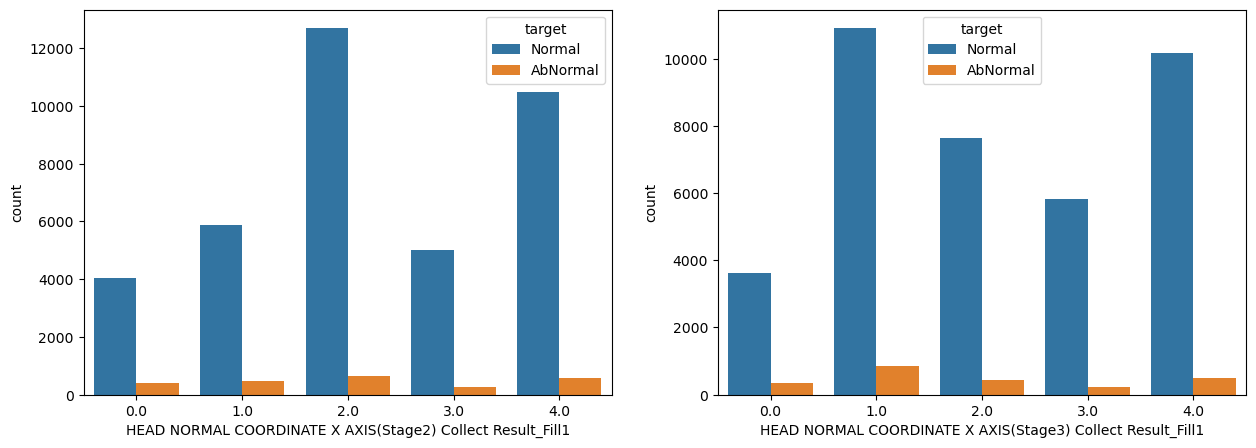

In [55]:
# bins 시각화

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.countplot(x="HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result Class_Fill1", hue="target", data=df, ax=axes[0]);
sns.countplot(x="HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result Class_Fill1", hue="target", data=df, ax=axes[1]);

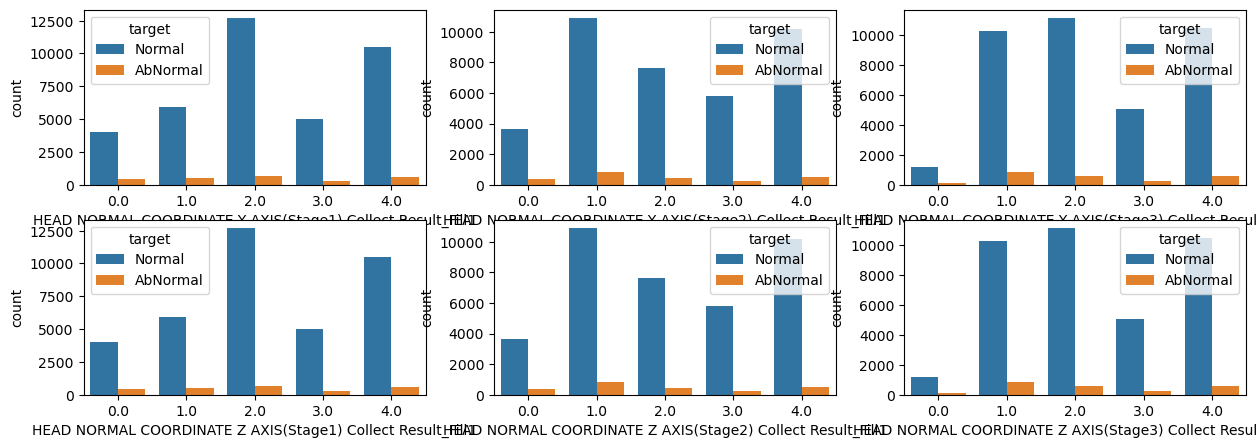

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))

sns.countplot(x="HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result Class_Fill1", hue="target", data=df, ax=axes[0, 0]);
sns.countplot(x="HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result Class_Fill1", hue="target", data=df, ax=axes[0, 1]);
sns.countplot(x="HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result Class_Fill1", hue="target", data=df, ax=axes[0, 2]);


sns.countplot(x="HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result Class_Fill1", hue="target", data=df, ax=axes[1,0]);
sns.countplot(x="HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result Class_Fill1", hue="target", data=df, ax=axes[1,1]);
sns.countplot(x="HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result Class_Fill1", hue="target", data=df, ax=axes[1,2]);

3. Head Standby/Clean/Purge - PCA

In [54]:
#Standby/Clean/Purge 관련 열만 추출

SCP_df = Fill1_df.iloc[:, 16:25]
SCP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   HEAD Standby Position X Collect Result_Fill1  40506 non-null  float64
 1   HEAD Standby Position Y Collect Result_Fill1  40506 non-null  int64  
 2   HEAD Standby Position Z Collect Result_Fill1  40506 non-null  int64  
 3   Head Clean Position X Collect Result_Fill1    40506 non-null  float64
 4   Head Clean Position Y Collect Result_Fill1    40506 non-null  float64
 5   Head Clean Position Z Collect Result_Fill1    40506 non-null  float64
 6   Head Purge Position X Collect Result_Fill1    40506 non-null  float64
 7   Head Purge Position Y Collect Result_Fill1    40506 non-null  int64  
 8   Head Purge Position Z Collect Result_Fill1    40506 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 2.8 MB


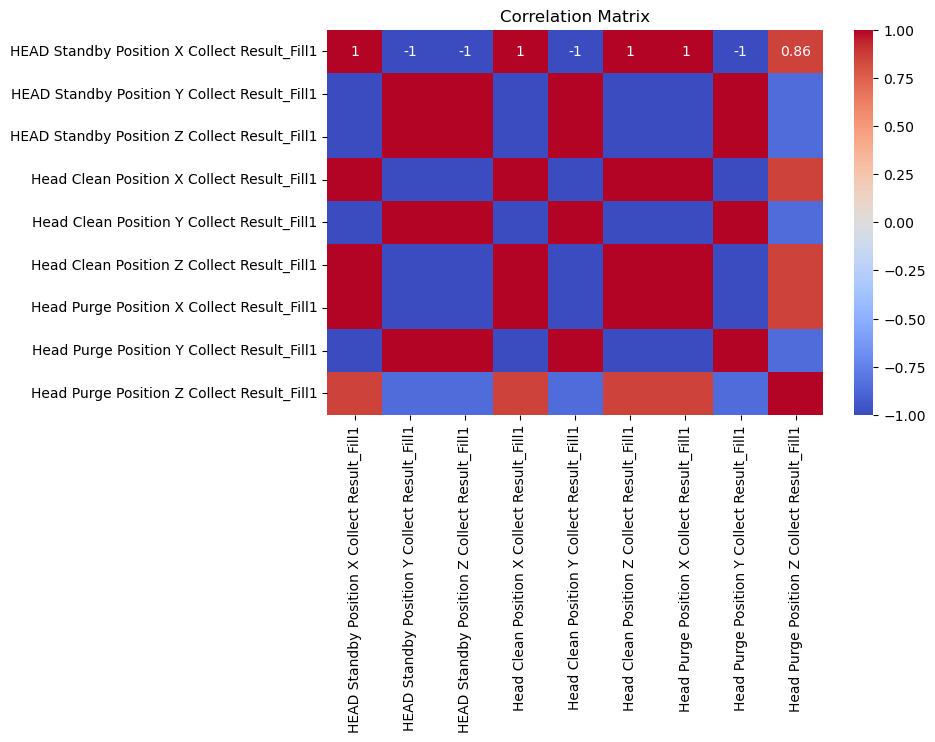

In [55]:
# heatmap

heatmap: plt.figure(figsize=(8, 5))
sns.heatmap(SCP_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix');


<Axes: xlabel='Head Purge Position Z Collect Result_Fill1', ylabel='count'>

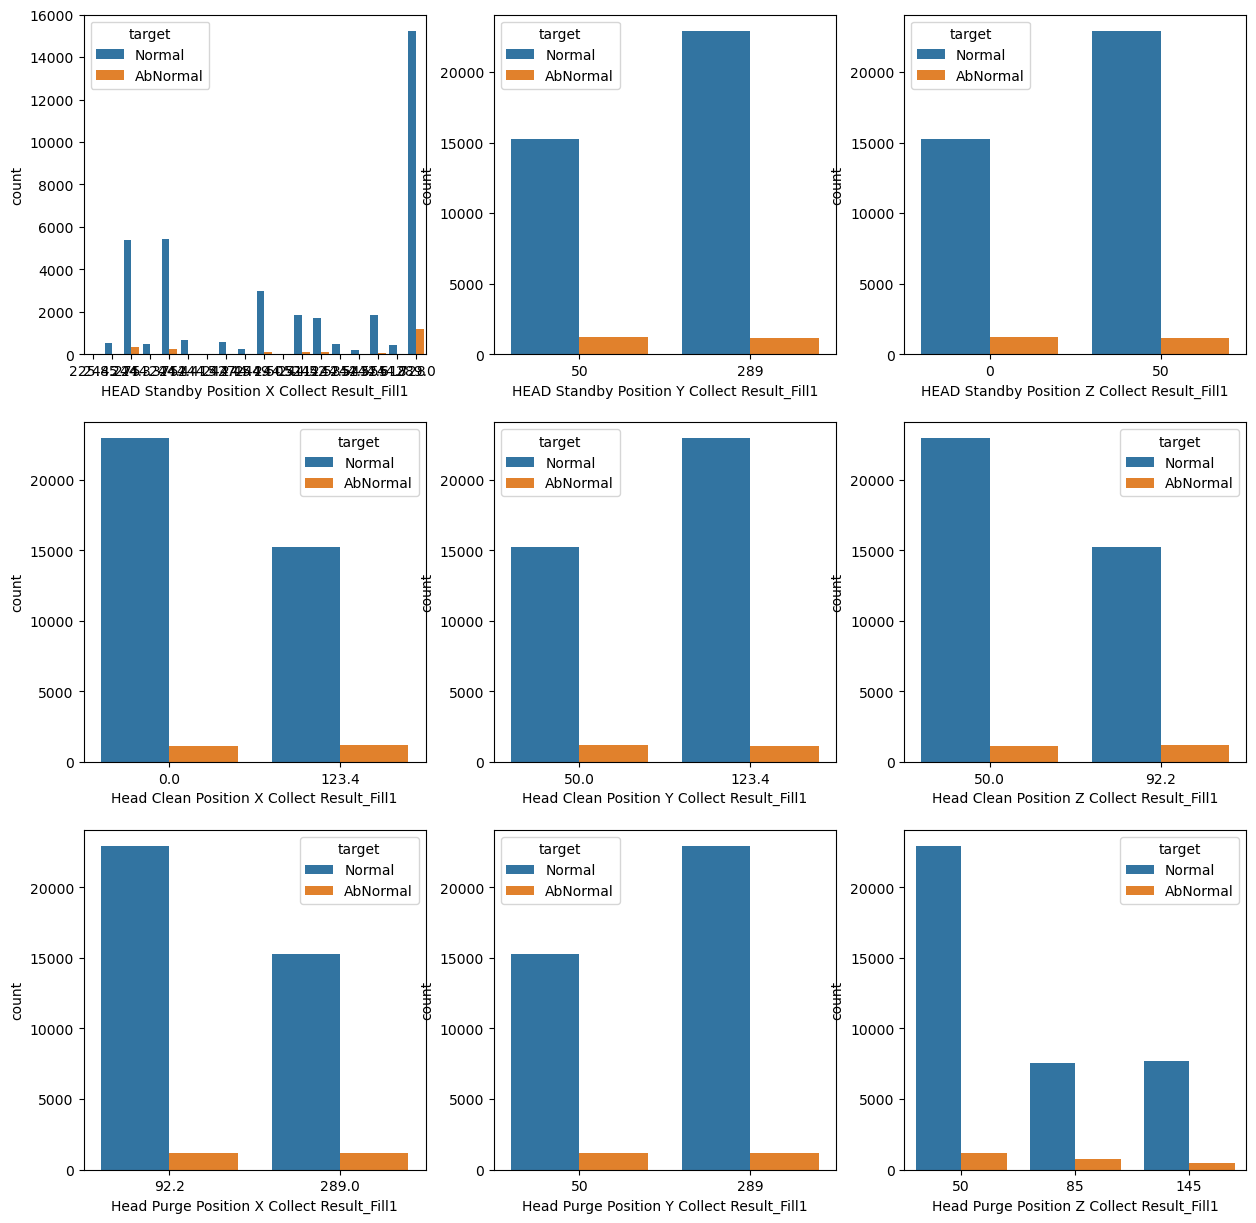

In [57]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

sns.countplot(x='HEAD Standby Position X Collect Result_Fill1', hue="target", data=df, ax=axes[0, 0]);
sns.countplot(x='HEAD Standby Position Y Collect Result_Fill1', hue="target", data=df, ax=axes[0, 1]);
sns.countplot(x='HEAD Standby Position Z Collect Result_Fill1', hue="target", data=df, ax=axes[0, 2]);

sns.countplot(x='Head Clean Position X Collect Result_Fill1', hue="target", data=df, ax=axes[1, 0]);
sns.countplot(x='Head Clean Position Y Collect Result_Fill1', hue="target", data=df, ax=axes[1, 1]);
sns.countplot(x='Head Clean Position Z Collect Result_Fill1', hue="target", data=df, ax=axes[1, 2])

sns.countplot(x='Head Purge Position X Collect Result_Fill1', hue="target", data=df, ax=axes[2, 0]);
sns.countplot(x='Head Purge Position Y Collect Result_Fill1', hue="target", data=df, ax=axes[2, 1]);
sns.countplot(x='Head Purge Position Z Collect Result_Fill1', hue="target", data=df, ax=axes[2, 2])

In [64]:
# X값 Stage 1,2,3 correlation 확인
# X만 standby 분포가 이상해서 고민했었는데 correlation이 높으니까 그냥 PCA할게!

df[["HEAD Standby Position X Collect Result_Fill1", "Head Clean Position X Collect Result_Fill1", "Head Purge Position X Collect Result_Fill1"]].corr()

,HEAD Standby Position X Collect Result_Fill1,Head Clean Position X Collect Result_Fill1,Head Purge Position X Collect Result_Fill1
HEAD Standby Position X Collect Result_Fill1,1.000000,0.999984,0.999984
Head Clean Position X Collect Result_Fill1,0.999984,1.000000,1.000000
Head Purge Position X Collect Result_Fill1,0.999984,1.000000,1.000000


In [65]:
# X standby/clean/purge PCA => 열 생성

x = df[["HEAD Standby Position X Collect Result_Fill1", "Head Clean Position X Collect Result_Fill1", "Head Purge Position X Collect Result_Fill1"]]
x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

from sklearn.decomposition import PCA

pca = PCA(n_components=1) # 주성분을 몇개로 할지 결정
pca_result = pca.fit_transform(x)

df["X Standby/Clean/Purge PCA_Fill1"] = pca_result

In [66]:
# Y standby/clean/purge PCA => 열 생성

x = df[["HEAD Standby Position Y Collect Result_Fill1", "Head Clean Position Y Collect Result_Fill1", "Head Purge Position Y Collect Result_Fill1"]]
x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

from sklearn.decomposition import PCA

pca = PCA(n_components=1) # 주성분을 몇개로 할지 결정
pca_result = pca.fit_transform(x)

df["Y Standby/Clean/Purge PCA_Fill1"] = pca_result

In [67]:
# Z standby/clean/purge PCA => 열 생성

x = df[["HEAD Standby Position Z Collect Result_Fill1", "Head Clean Position Z Collect Result_Fill1", "Head Purge Position Z Collect Result_Fill1"]]
x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

from sklearn.decomposition import PCA

pca = PCA(n_components=1) # 주성분을 몇개로 할지 결정
pca_result = pca.fit_transform(x)

df["Z Standby/Clean/Purge PCA_Fill1"] = pca_result

In [69]:
# 9개 전체 PCA => 열 생성

x = SCP_df
x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

from sklearn.decomposition import PCA

pca = PCA(n_components=1) # 주성분을 몇개로 할지 결정
pca_result = pca.fit_transform(x)

df["XYZ Standby/Clean/Purge PCA_Fill1"] = pca_result

In [70]:
list(df.columns)

['Equipment_Dam',
 'CURE END POSITION X Collect Result_Dam',
 'CURE END POSITION Z Collect Result_Dam',
 'CURE END POSITION Θ Collect Result_Dam',
 'CURE SPEED Collect Result_Dam',
 'CURE STANDBY POSITION X Collect Result_Dam',
 'CURE STANDBY POSITION Z Collect Result_Dam',
 'CURE STANDBY POSITION Θ Collect Result_Dam',
 'CURE START POSITION X Collect Result_Dam',
 'CURE START POSITION Z Collect Result_Dam',
 'CURE START POSITION Θ Collect Result_Dam',
 'DISCHARGED SPEED OF RESIN Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
 'Dispense Volume(Stage1) Collect Result_Dam',
 'Dispense Volume(Stage2) Collect Result_Dam',
 'Dispense Volume(Stage3) Collect Result_Dam',
 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam',
 '

4. Machine Tact Time ~ Workmode

- 분포 동일 X
- unique 값 모두 다름 => 파일별 값들이랑 비교

## Fill2

1. 단일값 제거

In [61]:
# 단일값이라 제거

df.drop(["CURE END POSITION Θ Collect Result_Fill2", "CURE STANDBY POSITION X Collect Result_Fill2", "CURE STANDBY POSITION Θ Collect Result_Fill2", "CURE START POSITION Θ Collect Result_Fill2"], axis=1, inplace=True)
df.drop(["DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill2", "DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill2", "DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill2", "Dispense Volume(Stage1) Collect Result_Fill2", "Dispense Volume(Stage2) Collect Result_Fill2", "Dispense Volume(Stage3) Collect Result_Fill2"], axis=1, inplace=True)

In [63]:
list(df.columns)

['Equipment_Dam',
 'CURE END POSITION X Collect Result_Dam',
 'CURE END POSITION Z Collect Result_Dam',
 'CURE END POSITION Θ Collect Result_Dam',
 'CURE SPEED Collect Result_Dam',
 'CURE STANDBY POSITION X Collect Result_Dam',
 'CURE STANDBY POSITION Z Collect Result_Dam',
 'CURE STANDBY POSITION Θ Collect Result_Dam',
 'CURE START POSITION X Collect Result_Dam',
 'CURE START POSITION Z Collect Result_Dam',
 'CURE START POSITION Θ Collect Result_Dam',
 'DISCHARGED SPEED OF RESIN Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
 'Dispense Volume(Stage1) Collect Result_Dam',
 'Dispense Volume(Stage2) Collect Result_Dam',
 'Dispense Volume(Stage3) Collect Result_Dam',
 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam',
 '

2. 분포 동일한 것끼리 시각화